Creating Plots in Jupyter Notebooks
=============================

<div class="overview-this-is-a-title overview">
<p class="overview-title">Overview</p>
    
<p>Questions</p>
    <ul>
        <li>How can I plot and annotate my data in Jupyter notebooks?
    </ul>
<p>Objectives:</p>
    <ul>
        <li>Repeat linear regression on the protein assay data to obtain best fit statistics.</li>
        <li>Create a plot of the data with the best fit line.</li>
        <li>Create a plot that includes confidence intervals.
    </ul>
<p>Keypoints:</p>
    <ul>
        <li>Use the matplotlib library to prepare a plot with data and a best fit line.</li>
        <li>Use the seaborn library to create a plot that includes a confidence interval.</li>
    </ul>
</div>

## Preparing to Plot

In recent lessons, we have learned to use pandas to import csv data into a dataframe that is very easy to access and use for plotting our data. We have also learned to do linear regression analysis using scipy. In this lesson, we will create linear regression plots of our data using two different libraries, matplotlib.pyplot and seaborn. As we add more libraries to our repretoire, we are going to track them in a table.

| Library | Uses | Abbreviation |
| :------- | :----: | :------------: |
| os | file management in operating systems | os |
| numpy | calculations | np  | 
| pandas | data management | pd |
| scipy | calculations and statistics | sc or sp | 
| matplotlib.pyplot | plotting data | plt |
| seaborn | plotting data | sns |

We will start by importing the data and linear regresson analysis from the last lesson.

In [2]:
import os
import pandas as pd
protein_file = os.path.join('data', 'protein_assay.csv')
results_df = pd.read_csv(protein_file)
xdata = results_df['mass (ug)']  # Setting the x values
ydata = results_df['A-595']  # setting the y values
from scipy import stats
slope, intercept, r_value, p_value, std_err = stats.linregress(xdata, ydata)
print("Slope = ", slope, "/mg/mL", sep = "")
print("Intercept = ", intercept)
print("R-squared = ", r_value**2)
print("P value = ", p_value)
print("Standard error = ", std_err)

Slope = 0.0011136480176211455/mg/mL
Intercept =  0.09153081057268722
R-squared =  0.9715760228371997
P value =  4.67252070582932e-05
Standard error =  8.518575456701815e-05


## Using Matplotlib.pyplot
Matplotlib is a library that supports static, animated and interactive data visualization in Python ([Matplotlib: Visualization with Python](https://matplotlib.org/)). Matplotlib is used alongside numpy to provide for MATLAB-style plotting. You can use matplotlib to create and fully annotate high resolution, publication quality plots that can be easily exported for inclusion in reports and manuscripts. It is possible to create many graph formats in matplotlib, including "picture within a picture graphs." Think of the chart options that are available in your spreadsheet program. These are all available with matplotlib, plus many more. 

We are going to use one subset of matplotlib's functions called pyplot. This approach is similar to using the stats subset of the functions found in scipy. This library contains tools for plotting and annotating the data. Let's start with a simple x-y scatter plot of the protein calibration curve data. First, we need to import the library, set the size of the figure and indicate the data for the plot.

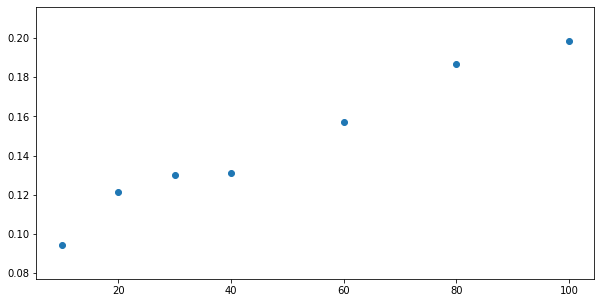

In [3]:
import numpy as np
import matplotlib.pyplot as plt
plt.figure(figsize = (10,5)) # set the size of the figure
plt.scatter(xdata, ydata) # scatter plot of the data

Next we add the best fit line using the slope and intercept that were generated by the stats.linregress function from scipy. The first two lines in the next cell are identical to the cell above (no need to import the libraries again). The third line introduces the best fit curve. You may notice a delay of a few seconds as the notebook generates the figure. The more complex the figure and the larger the dataset, the longer it takes for the plot to appear.

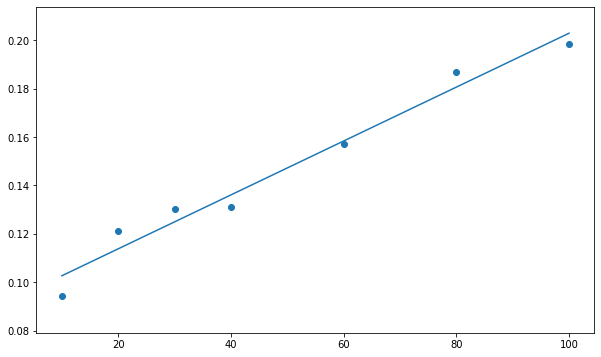

In [4]:
plt.figure(figsize = (10,6))
plt.scatter(xdata, ydata)
plt.plot(xdata, slope * xdata + intercept) # introduce the best-fit line

Next we will use functions for matplotlib.pyplot to add labels for each axis. It is possible to include subscripts and Greek letters in matplotlib figure labels using LaTeX. Here is a [link to a helpful site](https://towardsdatascience.com/write-markdown-latex-in-the-jupyter-notebook-10985edb91fd) about using markdown (used for the text cells in Jupyter notebook) and LaTeX in Jupyter notebooks by [Khelifi Ahmed Aziz](https://medium.com/@ahmedazizkhelifi).  

*Greek letters using LaTeX*: You can use an inline LaTeX equation to print Greek letters in matplotlib figures, using this format:

+ Start with a dollar sign:  \$
+ Type a backslash  \$\
+ Type the English version of the Greek letter, \$\mu 
+ End with a dollar sign  \\$\\mu\$
+ Examples: \\$\\alpha\\$ display as  $\alpha$;  \\$\\mu\\$ displays as  $\mu$

The command for printing the line equation includes `F`, which stands for `formatted string literal`. By using `F` it is possible to pull the values for slope and intercept that were generated with scipy.stats, by enclosing the variable names in braces, {}. It is also possible to set the precision by following the variable name with `:.4f` where 4 is the number of decimal places you want to appear and f represents the datatype, float.

Text(15, 0.19, 'y = 0.0011 * x + 0.0915')

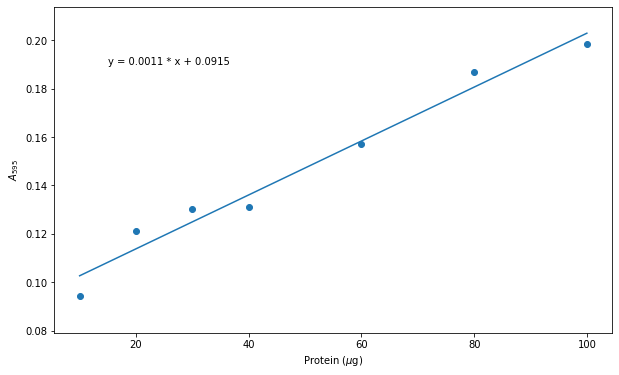

In [5]:
plt.figure(figsize = (10,6))
plt.scatter(xdata, ydata)
plt.plot(xdata, slope * xdata + intercept)
plt.xlabel('Protein ($\mu$g)')  # x-axis label
plt.ylabel('$A_{595}$')  # y-axis label in LaTeX _{595} makes 595 the subscripts
plt.annotate(F'y = {slope:.4f} * x + {intercept:.4f}', xy = (15, 0.19))

<div class="exercise-this-is-a-title exercise">
<p class="exercise-title">Check your understanding</p>
    <p>Take some time to play with the code for the figure above. Can you move the equation to the lower right hand corner of the plot? </p>
    
```{admonition} Solution
:class: dropdown

You can simply change the xy pair in the last line of the code.

```python
    plt.annotate(F'y = {slope:.4f} * x + {intercept:.4f}', xy = (60, 0.09))    
```   
</div>

You may be asking yourself, "Why didn't we generate a title for the figure?" That is certainly possible using the plt.title() function from matplotlib.pyplot. This was omitted because figures for publications and reports normally include separate text with a figure number, title and details as part of the text. To that end, we are going to learn to use the `savefig` command to produce a high resolution figure suitable for publication, which we will then learn to export to a file. Like many commands in python, it is simply a matter of getting the syntax right. We've added one line of code to save a high resolution image of our current figure.

In [ ]:
plt.figure(figsize = (10,6))
plt.scatter(xdata, ydata)
plt.plot(xdata, slope * xdata + intercept)
plt.xlabel('Protein ($\mu$g)')
plt.ylabel('$A_{595}$')
plt.annotate(F'y = {slope:.4f} * x + {intercept:.4f}', xy = (15, 0.19))
plt.savefig('Bradford_plot.png', dpi = 600, bbox_inches = 'tight')

Let's explore the line of code we wrote to save the figure. Once you have executed this command, you should find the plot in the same folder as the current Jupyter notebook. 
```python
plt.savefig('Bradford_plot.png', dpi = 600, bbox_inches = 'tight')
```
The arguments for plt.savefig are the filename (in single quotes because it is a string), the resolution (in dots per inch), the bounding box is 'tight', meaning that all the extra white space around the figure is removed.

There are many more options for plotting with matplotlib.pyplot. For example, if you wanted to have a red line in the plot, you could modify one line of code.

```python
plt.plot(xdata, slope * xdata + intercept) # add the argument 'r-'
plt.plot(xdata, slope * xdata + intercept, 'r-') # red line
```

## Scatter Plots with Seaborn

[Seaborn](https://seaborn.pydata.org/) is a Python library for statistical data visualization that is based on matplotlib. That means you can use all the commands from Matplotlib with Seaborn, but it also has high-level functions that group many Matplotlib functions to produce sophisticated graphs easily. 

Here we will use the Seaborn library to create a scatter plot that includes a confidence interval. Please note that seaborn has dependencies on other libraries (numpy, scipy, pandas, and matplotlib), so these must be imported before you can use Seaborn. 

The following plot is based on resources at [Statology](https://www.statology.org/scatterplot-with-regression-line-python/). I prefer this plot to the simple linear regression above because it makes the reliable regions of the calibration curve more obvious by displaying the 95% confidence interval. It also emphasizes the valid range for calculations based on the plot - that we can't use this curve to analyze absorbance values below 0.10 or above 0.20.

In [ ]:
import os
import pandas as pd
protein_file = os.path.join('data', 'protein_assay.csv')
results_df = pd.read_csv(protein_file)
xdata = results_df['mass (ug)']  
ydata = results_df['A-595'] 
from scipy import stats
slope, intercept, r_value, p_value, std_err = stats.linregress(xdata, ydata)

import seaborn as sns
sns.regplot(xdata, ydata)

<div class="exercise-this-is-a-title exercise">
<p class="exercise-title">Exercise</p>

Use a similar approach to the one described above to create a linear regression plot with confidence intervals for data that are a bit more scattered. The data can be found in the folder `data/protein_assay2.csv`. Increase the size of the figure, change the default x-axis and y-axis labels (taken by pandas from the column headers) to be mass ($\mu$g) and A$_{595}$ as before and insert the equation for the line within the plot. You final figure should look something like this:
    
![alt](Bradford_plot2.png "Protein Assay Plot 2")
    
```{admonition} Solution
:class: dropdown
    
```python
    protein_file2 = os.path.join('data', 'protein_assay2.csv')
    results_df = pd.read_csv(protein_file2)
    xdata = results_df['mass (ug)']
    ydata = results_df['A-595']
    slope, intercept, r_value, p_value, std_err = stats.linregress(xdata, ydata)
    import seaborn as sns
    sns.regplot(xdata, ydata)
    plt.xlabel('Protein ($\mu$g)')
    plt.ylabel('$A_{595}$')
    plt.annotate(F'y = {slope:.4f} * x + {intercept:.4f}', xy = (15, 0.22))
    plt.savefig('Bradford_plot2.png', dpi = 600, bbox_inches = 'tight')

```
    
</div>

In [ ]:
# Once this lesson is finalized, I'll remove this block of code.
protein_file2 = os.path.join('data', 'protein_assay2.csv')
results_df = pd.read_csv(protein_file2)
xdata = results_df['mass (ug)']
ydata = results_df['A-595']
slope, intercept, r_value, p_value, std_err = stats.linregress(xdata, ydata)
import seaborn as sns
sns.regplot(xdata, ydata)
plt.xlabel('Protein ($\mu$g)')
plt.ylabel('$A_{595}$')
plt.annotate(F'y = {slope:.4f} * x + {intercept:.4f}', xy = (15, 0.22))
plt.savefig('Bradford_plot2.png', dpi = 600, bbox_inches = 'tight')